# Cluster de produtos

O objetivo do cluster de produtos e idenficar quais produtos sao similares e que nao deverao ser oferecido juntos.

Importacao das bibliotecas necessarias

In [2]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import transforms
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

pd.set_option('display.max_columns', None)

In [3]:
Dataset3 = pd.read_csv("../repository/fundos_new.csv",sep=';')

Dataset3['FiltroValorMinimo__c'] = Dataset3['FiltroValorMinimo__c'].astype('str')
Dataset3['PatrimonioLiquidoAtual__c'] = Dataset3['PatrimonioLiquidoAtual__c'].astype('str')
Dataset3['LucroMesAnterior__c'] = Dataset3['LucroMesAnterior__c'].astype('str')
Dataset3['RentabilidadeMes__c'] = Dataset3['RentabilidadeMes__c'].astype('str')
Dataset3['RentabilidadeAno__c'] = Dataset3['RentabilidadeAno__c'].astype('str')
Dataset3['RentabilidadeFundoUltimos36Meses__c'] = Dataset3['RentabilidadeFundoUltimos36Meses__c'].astype('str')

Dataset3['FiltroValorMinimo__c'] = Dataset3['FiltroValorMinimo__c'].str.replace('.','')
Dataset3['PatrimonioLiquidoAtual__c'] = Dataset3['PatrimonioLiquidoAtual__c'].str.replace('.','')
Dataset3['LucroMesAnterior__c'] = Dataset3['LucroMesAnterior__c'].str.replace('.','')
Dataset3['RentabilidadeMes__c'] = Dataset3['RentabilidadeMes__c'].str.replace('.','')
Dataset3['RentabilidadeAno__c'] = Dataset3['RentabilidadeAno__c'].str.replace('.','')
Dataset3['RentabilidadeFundoUltimos36Meses__c'] = Dataset3['RentabilidadeFundoUltimos36Meses__c'].str.replace('.','')

Dataset3['FiltroValorMinimo__c'] = Dataset3['FiltroValorMinimo__c'].astype('float')
Dataset3['PatrimonioLiquidoAtual__c'] = Dataset3['PatrimonioLiquidoAtual__c'].astype('float')
Dataset3['LucroMesAnterior__c'] = Dataset3['LucroMesAnterior__c'].astype('float')
Dataset3['RentabilidadeMes__c'] = Dataset3['RentabilidadeMes__c'].astype('float')
Dataset3['RentabilidadeAno__c'] = Dataset3['RentabilidadeAno__c'].astype('float')
Dataset3['RentabilidadeFundoUltimos36Meses__c'] = Dataset3['RentabilidadeFundoUltimos36Meses__c'].astype('float')

Segue abaixo uma visualizacao dos dados que serao utilizadas no treinamento e teste.

In [4]:
Dataset3

,DescricaoTaxaPerformance__c,DescricaoTributacao__c,FamiliaCarteira__c,FiltroValorMinimo__c,ProdutoId,LucroMesAnterior__c,PatrimonioLiquidoAtual__c,RentabilidadeAno__c,RentabilidadeFundoUltimos36Meses__c,RentabilidadeMes__c,RiscoAtivo__c,TipoCarteira__c
0,20% sobre o que exceder a 100% do IBOVESPA,15%,Renda Variável,50000.0,a0W3u000009PBevEAG,2.243283e+08,6.331335e+09,4.001300e+08,0.000000e+00,1.719446e+08,5.0,FIC de Fundo de Ações
1,20% sobre o que exceder a 100% do IBOVESPA,15%,Renda Variável,50000.0,a0W3u000009PBfAEAW,-4.457896e+16,4.805841e+11,1.334016e+08,1.576082e+10,1.787775e+08,5.0,FIC de Fundo de Ações
2,20% sobre o que exceder a 100% do SMLL,15%,Renda Variável,5000.0,a0W3u000009PBlwEAG,7.361822e+08,1.744697e+10,1.132309e+09,0.000000e+00,3.689640e+08,5.0,FIC de Fundo de Ações
3,20% sobre o que exceder a 100% do IBOVESPA,15%,Renda Variável,5000.0,a0W3u000009PBm6EAG,4.883242e+08,7.407574e+09,8.178073e+08,3.485194e+10,3.141427e+08,5.0,Fundo de Ações
4,20% sobre o que exceder a 100% do CDI,15%,Renda Variável,50000.0,a0W3u000009PCgiEAG,3.874558e+08,6.760493e+10,6.945695e+07,1.259113e+10,2.956583e+08,5.0,FIC de Fundo de Ações
...,...,...,...,...,...,...,...,...,...,...,...,...
277,20% sobre o que exceder a 100% do CDI,Come Cotas,Renda Fixa,100000.0,a0W6A00000B1R9qUAF,-2.059635e+07,3.961012e+10,-3.252060e+07,2.862925e+09,-1.194886e+07,3.0,Fundo Multimercado
278,20% sobre o que exceder a 100% do IBRX 100,15%,Renda Variável,50000.0,a0W6A00000BDZuYUAX,-1.429954e+08,7.270503e+10,1.700072e+07,0.000000e+00,1.623172e+08,5.0,FIC de Fundo de Ações
279,20% sobre o que exceder a 100% do IPCA + YIELD...,15%,Renda Variável,50000.0,a0W6A00000BDaCYUA1,5.832781e+07,2.307813e+10,1.053665e+08,0.000000e+00,4.676591e+07,5.0,FIC de Fundo de Ações
280,20% sobre o que exceder a 100% do IPCA + 6%,15%,Renda Variável,50000.0,a0W6A00000BDcCFUA1,-2.755635e+08,3.598760e+11,7.745105e+07,1.662320e+10,3.630180e+16,5.0,FIC de Fundo de Ações


Foi realizado um processo de limpeza, onde foi removido os campos descritivos e os que contem informacoes pertinentes apenas ao registro em questao.

In [5]:
#dumizar, normalizar e manter variaveis que quero dumizar
produtos = Dataset3
produtos = produtos.drop(['DescricaoTaxaPerformance__c','TipoCarteira__c', 'ProdutoId'], axis=1)

# copiar colunas que quero manter antes de dumizar
produtos = pd.get_dummies(produtos)
produtos

scaler = StandardScaler()
produtos['FiltroValorMinimo__c_Scaler'] = 0
produtos['LucroMesAnterior__c_Scaler'] = 0
produtos['PatrimonioLiquidoAtual__c_Scaler'] = 0
produtos['RentabilidadeAno__c_Scaler'] = 0
produtos['RentabilidadeFundoUltimos36Meses__c_Scaler'] = 0
produtos['RentabilidadeMes__c_Scaler'] = 0

produtos[['FiltroValorMinimo__c_Scaler', 'LucroMesAnterior__c_Scaler',
          'PatrimonioLiquidoAtual__c_Scaler','RentabilidadeAno__c_Scaler',
          'RentabilidadeFundoUltimos36Meses__c_Scaler','RentabilidadeMes__c_Scaler']] = scaler.fit_transform(produtos[['FiltroValorMinimo__c', 'LucroMesAnterior__c',
                                                                                                                       'PatrimonioLiquidoAtual__c', 'RentabilidadeAno__c',
                                                                                                                       'RentabilidadeFundoUltimos36Meses__c','RentabilidadeMes__c']])
          
produtos = produtos.drop(['FiltroValorMinimo__c', 'LucroMesAnterior__c',
                          'PatrimonioLiquidoAtual__c', 'RentabilidadeAno__c',
                          'RentabilidadeFundoUltimos36Meses__c','RentabilidadeMes__c','PatrimonioLiquidoAtual__c_Scaler','LucroMesAnterior__c_Scaler'], axis=1)

In [6]:
produtos

,RiscoAtivo__c,DescricaoTributacao__c_15%,DescricaoTributacao__c_Come Cotas,FamiliaCarteira__c_Renda Fixa,FamiliaCarteira__c_Renda Variável,FiltroValorMinimo__c_Scaler,RentabilidadeAno__c_Scaler,RentabilidadeFundoUltimos36Meses__c_Scaler,RentabilidadeMes__c_Scaler
0,5.0,1,0,0,1,-0.146258,-0.132313,-0.783736,-0.147468
1,5.0,1,0,0,1,-0.146258,-0.132313,2.308883,-0.147468
2,5.0,1,0,0,1,-0.774246,-0.132313,-0.783736,-0.147468
3,5.0,1,0,0,1,-0.774246,-0.132313,6.054981,-0.147468
4,5.0,1,0,0,1,-0.146258,-0.132313,1.686921,-0.147468
...,...,...,...,...,...,...,...,...,...
277,3.0,0,1,1,0,0.551506,-0.132313,-0.221967,-0.147468
278,5.0,1,0,0,1,-0.146258,-0.132313,-0.783736,-0.147468
279,5.0,1,0,0,1,-0.146258,-0.132313,-0.783736,-0.147468
280,5.0,1,0,0,1,-0.146258,-0.132313,2.478102,8.231745


In [7]:
produtos = produtos[['FiltroValorMinimo__c_Scaler','FamiliaCarteira__c_Renda Fixa','FamiliaCarteira__c_Renda Variável','RiscoAtivo__c','RentabilidadeAno__c_Scaler']]
produtos

,FiltroValorMinimo__c_Scaler,FamiliaCarteira__c_Renda Fixa,FamiliaCarteira__c_Renda Variável,RiscoAtivo__c,RentabilidadeAno__c_Scaler
0,-0.146258,0,1,5.0,-0.132313
1,-0.146258,0,1,5.0,-0.132313
2,-0.774246,0,1,5.0,-0.132313
3,-0.774246,0,1,5.0,-0.132313
4,-0.146258,0,1,5.0,-0.132313
...,...,...,...,...,...
277,0.551506,1,0,3.0,-0.132313
278,-0.146258,0,1,5.0,-0.132313
279,-0.146258,0,1,5.0,-0.132313
280,-0.146258,0,1,5.0,-0.132313


Foi separado os dados de treino e teste. 80% para treino e 20% para teste

In [8]:
produtos_train, produtos_test, Y_vazio, y_vazio = train_test_split(produtos, np.arange(0,282), test_size=0.20, random_state=42)

A quantidade de agrupamento que mais obteve sucesso foi 5 clusters.

In [9]:
Kmean = KMeans(n_clusters=5)
Kmean.fit(produtos_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
dfL = pd.DataFrame({'label': Kmean.labels_})
result = pd.concat([Dataset3, dfL], axis=1, join='inner')

result.groupby(['label'])['label'].count()

label
0    86
1     3
2    21
3    47
4    68
Name: label, dtype: int64

In [11]:
result[result['label'] == 3]
#result.columns

,DescricaoTaxaPerformance__c,DescricaoTributacao__c,FamiliaCarteira__c,FiltroValorMinimo__c,ProdutoId,LucroMesAnterior__c,PatrimonioLiquidoAtual__c,RentabilidadeAno__c,RentabilidadeFundoUltimos36Meses__c,RentabilidadeMes__c,RiscoAtivo__c,TipoCarteira__c,label
1,20% sobre o que exceder a 100% do IBOVESPA,15%,Renda Variável,50000.0,a0W3u000009PBfAEAW,-4.457896e+16,4.805841e+11,1.334016e+08,1.576082e+10,1.787775e+08,5.0,FIC de Fundo de Ações,3
7,20% sobre o que exceder a 100% do IBRX,15%,Renda Variável,100000.0,a0W3u000009PCs8EAG,1.432249e+08,1.191013e+10,3.965176e+08,0.000000e+00,2.497162e+08,5.0,Fundo de Ações,3
12,20% sobre o que exceder a 100% do CDI,Come Cotas,Renda Fixa,100000.0,a0W3u000009PE5LEAW,-9.193461e+07,1.782331e+13,-6.942398e+06,2.582161e+08,8.578083e+07,4.0,FIC de Fundo Multimercado,3
20,Não,Come Cotas,Renda Fixa,5000.0,a0W3u00000AdCmFEAV,4.127736e+07,1.203082e+11,4.524792e+07,2.480181e+09,3.954243e+06,3.0,Fundo de Renda Fixa,3
24,20% sobre o que exceder a 100% do CDI,Come Cotas,Renda Fixa,200000.0,a0W3u00000AdDrzEAF,1.570529e+08,3.780195e+16,2.687919e+08,0.000000e+00,1.100112e+08,5.0,FIC de Fundo Multimercado,3
31,Não,Come Cotas,Renda Fixa,10000.0,a0W3u00000AdEGBEA3,4.204122e+07,2.328663e+11,4.225960e+07,2.494552e+09,2.174660e+05,3.0,Fundo de Renda Fixa,3
33,Não,Come Cotas,Renda Fixa,1000.0,a0W3u00000AdFaXEAV,4.546831e+06,1.085850e+10,4.834843e+07,0.000000e+00,2.867083e+06,4.0,FIC de Fundo Multimercado,3
34,Não,Come Cotas,Renda Fixa,10000.0,a0W3u00000AdFb1EAF,4.413584e+07,1.554566e+10,4.682692e+07,2.326054e+09,2.679249e+06,4.0,FIC de Fundo Multimercado,3
40,20% sobre o que exceder a 100% do CDI,Come Cotas,Renda Fixa,100000.0,a0W3u00000AdGFdEAN,4.646687e+07,1.907947e+10,5.520256e+07,2.734906e+09,8.695283e+06,2.0,FIC de Fundo de Renda Fixa,3
46,20% sobre o que exceder a 100% do IBRX 100,15%,Renda Variável,200000.0,a0W3u00000AdGc9EAF,-1.547174e+08,2.134384e+10,1.515239e+07,8.289534e+09,1.725392e+08,5.0,Fundo de Ações,3


In [12]:
result.groupby(['label','RiscoAtivo__c'])['label','RiscoAtivo__c'].count()

label  RiscoAtivo__c
label RiscoAtivo__c                      
0     2.0                2              2
      3.0               20             20
      4.0               24             24
      5.0               40             40
1     4.0                2              2
      5.0                1              1
2     2.0                1              1
      3.0                1              1
      4.0               12             12
      5.0                7              7
3     2.0                1              1
      3.0                6              6
      4.0               16             16
      5.0               24             24
4     1.0                1              1
      2.0                1              1
      3.0               15             15
      4.0               18             18
      5.0               33             33

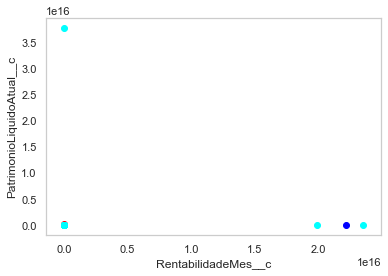

In [13]:
plt.scatter(result[result['label'] == 0].RentabilidadeMes__c, result[result['label'] == 0].PatrimonioLiquidoAtual__c, c = 'red', label = 'Cluster 1')
plt.scatter(result[result['label'] == 1].RentabilidadeMes__c, result[result['label'] == 1].PatrimonioLiquidoAtual__c, c = 'blue', label = 'Cluster 2')
plt.scatter(result[result['label'] == 2].RentabilidadeMes__c, result[result['label'] == 2].PatrimonioLiquidoAtual__c, c = 'green', label = 'Cluster 3')
plt.scatter(result[result['label'] == 3].RentabilidadeMes__c, result[result['label'] == 3].PatrimonioLiquidoAtual__c, c = 'cyan', label = 'Cluster 4')
plt.xlabel('RentabilidadeMes__c')
plt.ylabel('PatrimonioLiquidoAtual__c')
plt.show()


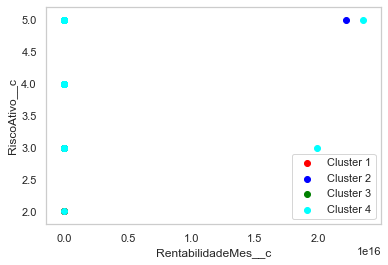

In [14]:
plt.scatter(result[result['label'] == 0].RentabilidadeMes__c, result[result['label'] == 0].RiscoAtivo__c, c = 'red', label = 'Cluster 1')
plt.scatter(result[result['label'] == 1].RentabilidadeMes__c, result[result['label'] == 1].RiscoAtivo__c, c = 'blue', label = 'Cluster 2')
plt.scatter(result[result['label'] == 2].RentabilidadeMes__c, result[result['label'] == 2].RiscoAtivo__c, c = 'green', label = 'Cluster 3')
plt.scatter(result[result['label'] == 3].RentabilidadeMes__c, result[result['label'] == 3].RiscoAtivo__c, c = 'cyan', label = 'Cluster 4')
plt.xlabel('RentabilidadeMes__c')
plt.ylabel('RiscoAtivo__c')
plt.legend()
plt.show()

In [15]:
result

,DescricaoTaxaPerformance__c,DescricaoTributacao__c,FamiliaCarteira__c,FiltroValorMinimo__c,ProdutoId,LucroMesAnterior__c,PatrimonioLiquidoAtual__c,RentabilidadeAno__c,RentabilidadeFundoUltimos36Meses__c,RentabilidadeMes__c,RiscoAtivo__c,TipoCarteira__c,label
0,20% sobre o que exceder a 100% do IBOVESPA,15%,Renda Variável,50000.0,a0W3u000009PBevEAG,2.243283e+08,6.331335e+09,4.001300e+08,0.000000e+00,1.719446e+08,5.0,FIC de Fundo de Ações,0
1,20% sobre o que exceder a 100% do IBOVESPA,15%,Renda Variável,50000.0,a0W3u000009PBfAEAW,-4.457896e+16,4.805841e+11,1.334016e+08,1.576082e+10,1.787775e+08,5.0,FIC de Fundo de Ações,3
2,20% sobre o que exceder a 100% do SMLL,15%,Renda Variável,5000.0,a0W3u000009PBlwEAG,7.361822e+08,1.744697e+10,1.132309e+09,0.000000e+00,3.689640e+08,5.0,FIC de Fundo de Ações,4
3,20% sobre o que exceder a 100% do IBOVESPA,15%,Renda Variável,5000.0,a0W3u000009PBm6EAG,4.883242e+08,7.407574e+09,8.178073e+08,3.485194e+10,3.141427e+08,5.0,Fundo de Ações,4
4,20% sobre o que exceder a 100% do CDI,15%,Renda Variável,50000.0,a0W3u000009PCgiEAG,3.874558e+08,6.760493e+10,6.945695e+07,1.259113e+10,2.956583e+08,5.0,FIC de Fundo de Ações,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,20% sobre o que exceder a 100% do IBOVESPA,15%,Renda Variável,10000.0,a0W6A00000A4sdBUAR,1.718242e+08,6.373771e+10,3.871639e+08,1.353249e+10,2.117022e+08,5.0,Fundo de Ações,4
221,20% sobre o que exceder a 100% do CDI,Come Cotas,Renda Fixa,50000.0,a0W6A00000A4zhSUAR,1.866227e+07,1.847607e+11,6.884183e+07,3.601762e+09,5.008608e+07,5.0,FIC de Fundo Multimercado,0
222,20% sobre o que exceder a 100% do CDI,Come Cotas,Renda Fixa,50000.0,a0W6A00000AAHO5UAP,2.014656e+07,2.784896e+09,4.293107e+07,2.774232e+09,2.273869e+07,4.0,FIC de Fundo Multimercado,3
223,20% sobre o que exceder a 100% do IBOVESPA,15%,Renda Variável,50000.0,a0W6A00000AAMe0UAH,9.363908e+07,4.581574e+10,3.180176e+08,1.026567e+10,2.222970e+16,5.0,FIC de Fundo de Ações,1


In [16]:
Kmean = KMeans(n_clusters=4)

Kmean.fit(produtos)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
dfL = pd.DataFrame({'label': Kmean.labels_})
alldata = pd.concat([Dataset3, dfL], axis=1, join='inner')

groupByProduct = alldata
groupByProduct

,DescricaoTaxaPerformance__c,DescricaoTributacao__c,FamiliaCarteira__c,FiltroValorMinimo__c,ProdutoId,LucroMesAnterior__c,PatrimonioLiquidoAtual__c,RentabilidadeAno__c,RentabilidadeFundoUltimos36Meses__c,RentabilidadeMes__c,RiscoAtivo__c,TipoCarteira__c,label
0,20% sobre o que exceder a 100% do IBOVESPA,15%,Renda Variável,50000.0,a0W3u000009PBevEAG,2.243283e+08,6.331335e+09,4.001300e+08,0.000000e+00,1.719446e+08,5.0,FIC de Fundo de Ações,0
1,20% sobre o que exceder a 100% do IBOVESPA,15%,Renda Variável,50000.0,a0W3u000009PBfAEAW,-4.457896e+16,4.805841e+11,1.334016e+08,1.576082e+10,1.787775e+08,5.0,FIC de Fundo de Ações,0
2,20% sobre o que exceder a 100% do SMLL,15%,Renda Variável,5000.0,a0W3u000009PBlwEAG,7.361822e+08,1.744697e+10,1.132309e+09,0.000000e+00,3.689640e+08,5.0,FIC de Fundo de Ações,0
3,20% sobre o que exceder a 100% do IBOVESPA,15%,Renda Variável,5000.0,a0W3u000009PBm6EAG,4.883242e+08,7.407574e+09,8.178073e+08,3.485194e+10,3.141427e+08,5.0,Fundo de Ações,0
4,20% sobre o que exceder a 100% do CDI,15%,Renda Variável,50000.0,a0W3u000009PCgiEAG,3.874558e+08,6.760493e+10,6.945695e+07,1.259113e+10,2.956583e+08,5.0,FIC de Fundo de Ações,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,20% sobre o que exceder a 100% do CDI,Come Cotas,Renda Fixa,100000.0,a0W6A00000B1R9qUAF,-2.059635e+07,3.961012e+10,-3.252060e+07,2.862925e+09,-1.194886e+07,3.0,Fundo Multimercado,1
278,20% sobre o que exceder a 100% do IBRX 100,15%,Renda Variável,50000.0,a0W6A00000BDZuYUAX,-1.429954e+08,7.270503e+10,1.700072e+07,0.000000e+00,1.623172e+08,5.0,FIC de Fundo de Ações,0
279,20% sobre o que exceder a 100% do IPCA + YIELD...,15%,Renda Variável,50000.0,a0W6A00000BDaCYUA1,5.832781e+07,2.307813e+10,1.053665e+08,0.000000e+00,4.676591e+07,5.0,FIC de Fundo de Ações,0
280,20% sobre o que exceder a 100% do IPCA + 6%,15%,Renda Variável,50000.0,a0W6A00000BDcCFUA1,-2.755635e+08,3.598760e+11,7.745105e+07,1.662320e+10,3.630180e+16,5.0,FIC de Fundo de Ações,0


In [18]:
groupByProduct.to_csv('../repository/produtos_groups_fundos.csv')